<a href="https://colab.research.google.com/github/neel786/ML-DL/blob/main/4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting if a person would buy life insurnace based on his age using logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [15]:
df.shape

(27, 2)

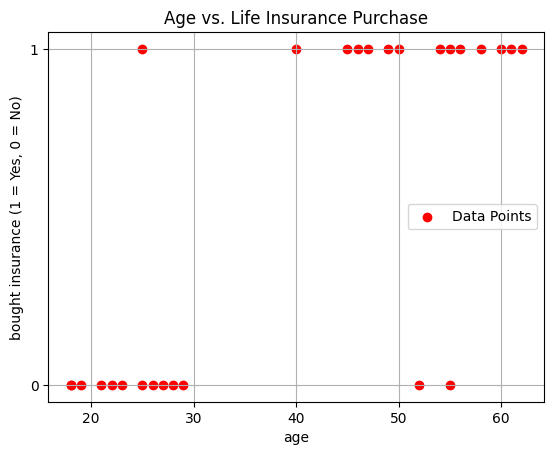

In [6]:
# Plotting the data
plt.scatter(df['age'], df['bought_insurance'], color='red', marker='o', label="Data Points")
plt.xlabel("age")
plt.ylabel("bought insurance (1 = Yes, 0 = No)")
plt.title("Age vs. Life Insurance Purchase")
plt.yticks([0, 1])  # Ensures y-axis only has 0 and 1
plt.legend()
plt.grid(True)
plt.show()

In [3]:
X = df[['age']]  # Independent variable (Feature)
y = df['bought_insurance']  # Dependent variable (Target)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Display training and testing set
print("Training Data:\n", X_train)
print("Testing Data:\n", X_test)


Training Data:
     age
16   25
17   58
12   27
24   50
1    25
4    46
5    56
2    47
15   55
22   40
3    52
25   54
23   45
18   19
26   23
20   21
7    60
10   18
14   49
19   18
6    55
Testing Data:
     age
8    62
13   29
9    61
21   26
0    22
11   28


In [19]:
X_test

,age
8,62
15,55
18,19
5,56
3,52
19,18


In [16]:
X_train

,age
16,25
17,58
12,27
24,50
1,25
4,46
5,56
2,47
15,55
22,40


In [7]:
# Creating Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

# Display predictions
print("Predicted Values:", y_pred)


Predicted Values: [1 0 1 0 0 0]


In [9]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


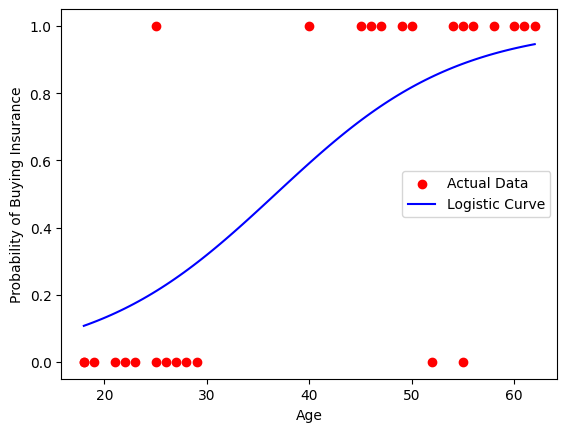

In [12]:
# Plot the data points
plt.scatter(df['age'], df['bought_insurance'], color='red', label="Actual Data")

# Plot the logistic regression curve
age_range = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]

plt.plot(age_range, probabilities, color='blue', label="Logistic Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.legend()
plt.show()


In [13]:
# Predict if a 50-year-old person will buy insurance
new_age = [[50]]
prediction = model.predict(new_age)
probability = model.predict_proba(new_age)[:, 1]

print(f"Prediction for age {new_age[0][0]}: {'Buys Insurance' if prediction[0] == 1 else 'Does Not Buy Insurance'}")
print(f"Probability of Buying Insurance: {probability[0]:.2f}")


Prediction for age 50: Buys Insurance
Probability of Buying Insurance: 0.82


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
model.predict_proba(X_test)

array([[0.05428672, 0.94571328],
       [0.7055532 , 0.2944468 ],
       [0.06039333, 0.93960667],
       [0.77084966, 0.22915034],
       [0.84096469, 0.15903531],
       [0.72848723, 0.27151277]])